In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [5]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

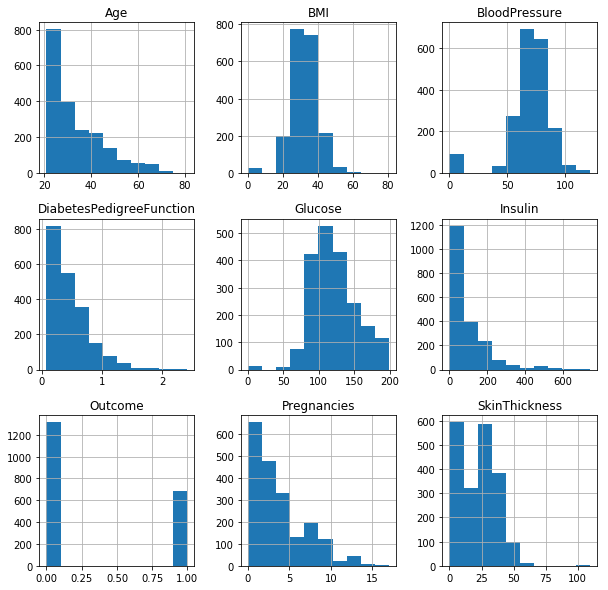

In [6]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

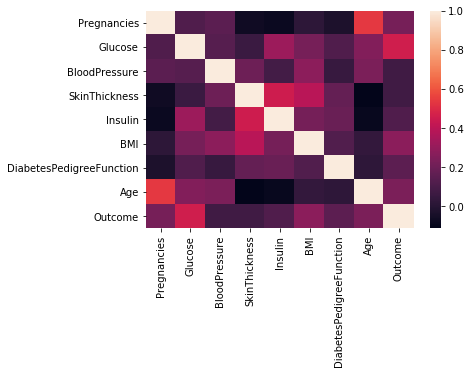

In [7]:
#correlation

sns.heatmap(df.corr())

# we can analyze skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

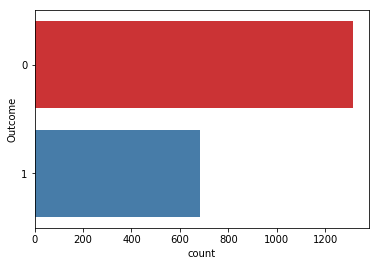

In [9]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

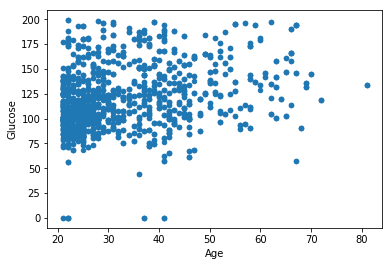

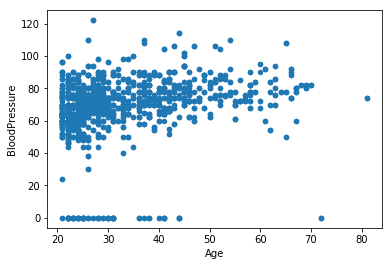

In [10]:
#scatter plot to understand

df.plot(kind='scatter',x='Age',y='Glucose')
df.plot(kind='scatter',x='Age',y='BloodPressure')

In [11]:
#lets extract feature

X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [13]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1600, 8), (400, 8), (1600,), (400,))

In [21]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

#display predicted values
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Accuracy 0.79 ROC 0.7415584773560462


C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
#Support Vector Machine

from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

#display predicted values
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Accuracy 0.795 ROC 0.7453898949805672


In [23]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
accuracy_score(test_y,y_pred)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

#display predicted values
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Accuracy 0.8275 ROC 0.8123294467873977


In [24]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
accuracy_score(test_y,y_pred)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

#display predicted values
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Accuracy 0.9575 ROC 0.9422117478431049


C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
accuracy_score(test_y,y_pred)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

#display predicted values
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

Accuracy 0.7525 ROC 0.7161856721519335


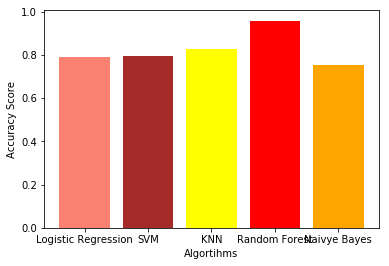

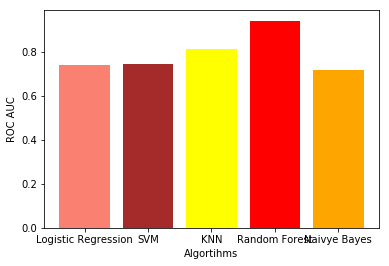

In [35]:
#lets plot the bar graph

plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes'],acc,color=['salmon','brown','yellow','red','orange'],label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes'],roc,color=['salmon','brown','yellow','red','orange'],label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()


#Random forest has highest accuracy 95%+- and ROC_AUC curve 95%+-
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient